<a href="https://colab.research.google.com/github/victorluizz/topicosAvancadosGDI/blob/main/GDI_Avan%C3%A7ado_Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo projeto

No primeiro projeto, utilizamos a API da NBA para puxar os dados da temporada 2019-20. Tentamos seguir o seu conselho e utilizar os mesmos dados para tentar prever quantos pontos o jogador faria no próximo jogo. Entretanto, os modelos estavam com resultados "perfeitos" demais, e achamos melhor trocar o dataset.

Dessa vez, estamos comum dataset com dados médicos sobre alguns pacientes e seu status de diabestes, sendo 0 para negativo, e 1 para positivo para a doença.

Link do dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

Link do vídeo: https://drive.google.com/file/d/1_kMfFbzcr7vkEYpyt8q5vL5w7xFj44hL/view?usp=sharing

In [ ]:
!pip install mlflow


## Primeiros passos

Antes de tudo, estaremos importando o dataset e posteriormente trabalhando com o mesmo.

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset'

od.download(dataset_url)

Skipping, found downloaded files in "./diabetes-prediction-dataset" (use force=True to force download)


In [ ]:
import pandas as pd

# Caminho para o arquivo CSV (ajustar conforme necessário)
file_path = '/content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv'

# Carregar o dataset
df = pd.read_csv(file_path)

# Mostrar as primeiras linhas do dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Colunas

As colunas possuem informações que são de extrema importância para a classifcação. Há duas colunas que precisamos tratar antes de iniciarmos, sendo elas a de gênero (gender) e a de histórico de tabagismo (smoking_history).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Coluna "gender"

Nessa coluna, existem três tipos de valores, sendo eles: Male, Female e Other. Iremos transforma-los para respectivmamente: 0, 1 e 2.



In [ ]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0


### Coluna "somking_history"

Nessa coluna, temos seis valores, sendo eles: 'never' 'No Info' 'current' 'former' 'ever' 'not current'. Iremos deletar a coluna original e criar novas para cada valor já existente. Nas novas colunas, os valores serão convertidos para 0 e 1.

In [ ]:
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

boolean_columns = [
    'smoking_history_current',
    'smoking_history_ever',
    'smoking_history_former',
    'smoking_history_never',
    'smoking_history_not current'
]

df[boolean_columns] = df[boolean_columns].astype(int)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0
2,0,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,1,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,0,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0


In [ ]:
df_reduzido = df.sample(n=3000, random_state=42)

In [ ]:
df_reduzido.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75721,1,13.0,0,0,20.82,5.8,126,0,0,0,0,0,0
80184,1,3.0,0,0,21.00,5.0,145,0,0,0,0,0,0
19864,0,63.0,0,0,25.32,3.5,200,0,0,0,1,0,0
76699,1,2.0,0,0,17.43,6.1,126,0,0,0,0,1,0
92991,1,33.0,0,0,40.08,6.2,200,1,0,0,0,0,1


## Escolhendo a coluna para trabalhar

A coluna escolhida será a de "diabetes", que possui a informação se o paciente possui ou não diabetes. As outras serão utilizadas como features para nos ajudar na classificação.

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df_reduzido.drop('diabetes', axis=1)
y = df_reduzido['diabetes']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [ ]:
models_params = {
    'Logistic_Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1.0, 10.0], 'penalty': ['l2']}),
    'Random_Forest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 10]}),
    'SVM': (SVC(), {'C': [1, 10], 'gamma': ['scale'], 'kernel': ['linear', 'rbf']}),
    'Gradient_Boosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.1]})
}

In [ ]:
def grid_search_track_and_evaluate(model_name):
    model, param_grid = models_params[model_name]
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

    with mlflow.start_run(run_name=model_name):
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        mlflow.log_param("model_name", model_name)
        mlflow.log_params(best_params)

        best_model = grid_search.best_estimator_

        val_accuracy = best_model.score(X_val, y_val)
        mlflow.log_metric("validation_accuracy", val_accuracy)

        test_accuracy = best_model.score(X_test, y_test)
        mlflow.log_metric("test_accuracy", test_accuracy)

        mlflow.sklearn.log_model(best_model, "model")

        print(f"Modelo {model_name} treinado com acurácia de validação {val_accuracy:.2f} e acurácia de teste {test_accuracy:.2f}")

        return model_name, best_model, val_accuracy, test_accuracy


In [ ]:
results = [grid_search_track_and_evaluate(model_name) for model_name in models_params]

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Modelo Logistic_Regression treinado com acurácia de validação 0.95 e acurácia de teste 0.96
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Modelo Random_Forest treinado com acurácia de validação 0.96 e acurácia de teste 0.97
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Modelo SVM treinado com acurácia de validação 0.95 e acurácia de teste 0.96
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Modelo Gradient_Boosting treinado com acurácia de validação 0.96 e acurácia de teste 0.97


In [ ]:
best_model_name, best_model, best_val_accuracy, best_test_accuracy = max(results, key=lambda x: x[2])

print(f"Melhor modelo encontrado foi o '{best_model_name}' com acurácia de validação de {best_val_accuracy:.2f} e acurácia de teste de {best_test_accuracy:.2f}")

Melhor modelo encontrado foi o 'Random_Forest' com acurácia de validação de 0.96 e acurácia de teste de 0.97


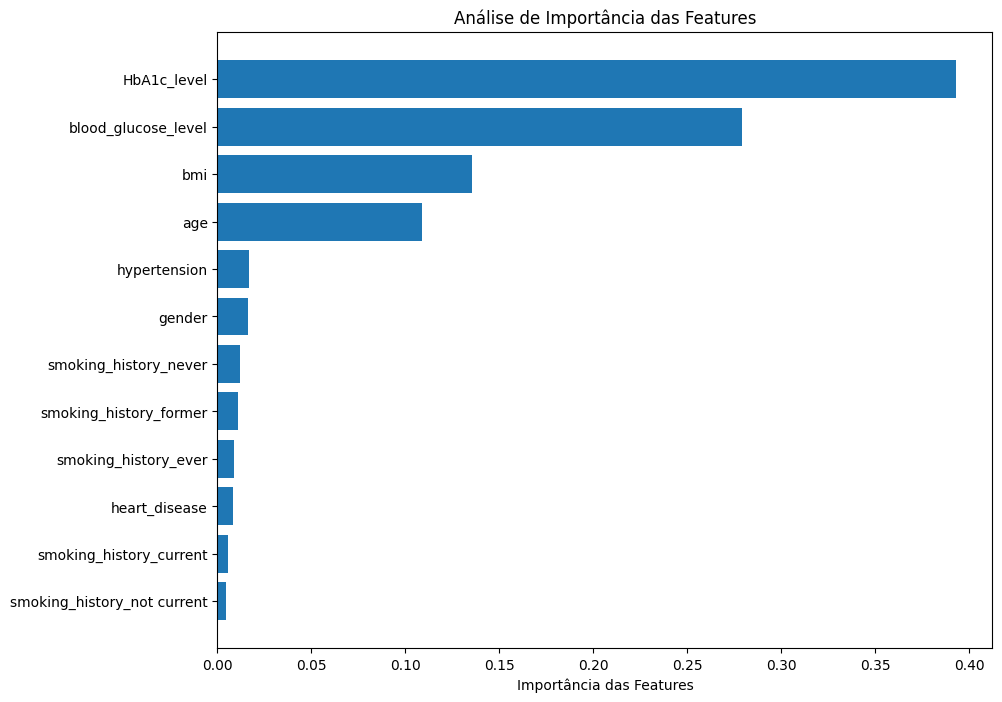

In [ ]:
import matplotlib.pyplot as plt


feature_importances = best_model.feature_importances_
feature_names = X.columns

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importância das Features')
plt.title('Análise de Importância das Features')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define o grid de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=best_model,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

with mlflow.start_run(run_name="Random_Forest_Tuned"):
    random_search.fit(X_train, y_train)

    best_model_tuned = random_search.best_estimator_

    val_accuracy_tuned = accuracy_score(y_val, best_model_tuned.predict(X_val))
    mlflow.log_metric("validation_accuracy_tuned", val_accuracy_tuned)

    mlflow.sklearn.log_model(best_model_tuned, "model_tuned")

    print(f"Modelo Random Forest ajustado treinado com acurácia de validação: {val_accuracy_tuned:.2f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Modelo Random Forest ajustado treinado com acurácia de validação: 0.96
